## Домашнее задание Проверка гипотез


<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>


In [39]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import pylab

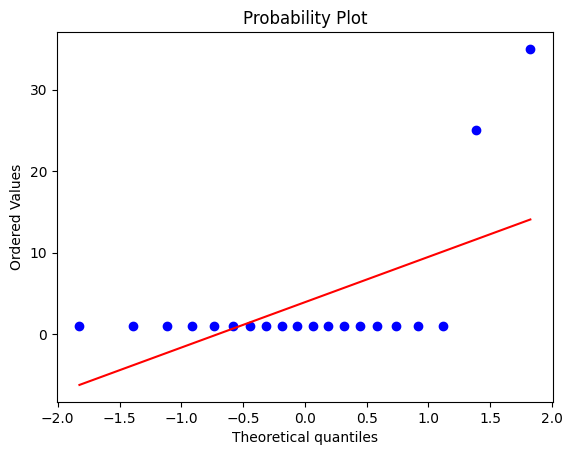

Отклоняем нулевую гипотезу >> Данные распределены не нормально 1.0132843327915469e-07


In [42]:
def check_normality(data):
    # не понял как это проверять исходя из материалов лекции?
    stat, pval = st.normaltest(data)
    st.probplot(data, dist="norm", plot=pylab)
    pylab.show()

    if pval < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально", pval)
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально", pval)


x = st.norm.rvs(loc=0, scale=10, size=50)
x = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 35, 25, 1, 1, 1, 1, 1]
check_normality(x)

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.

-   Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
-   Покажите различия визуально
-   Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>


In [65]:
np.random.seed(42)  # фиксация случайности

mens = st.norm.rvs(
    loc=171, scale=10, size=150000
)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(
    loc=170, scale=10, size=150000
)  # Выборка женщин со средним ростом 170

Не понимаю почему в данном случае pval ~ 0 т.к. судя по графику выборки различаются незначительно.

1. Не является.
2. Предполагаю, что уровень значимости в 0.001 находится на уровне погрешности? (незнаю:)

pval 4.013049237709119e-176


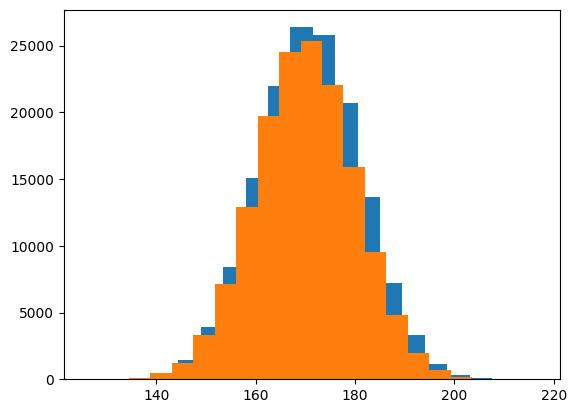

In [104]:
stat, p = st.ttest_ind(mens, womens)
if p > 0.001:
    print("Различие незначительно")
print("pval", p)
plt.hist(mens, bins=20)
plt.hist(womens, bins=20)
plt.show()

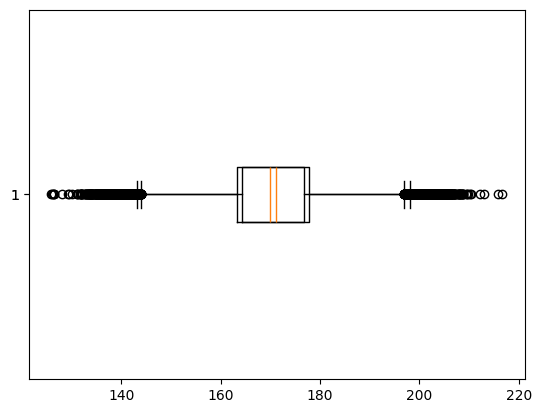

In [107]:
plt.boxplot(mens, vert=False)
plt.boxplot(womens, vert=False)
plt.show()

In [77]:
st.ttest_ind([1, 2, 3], [3, 2, 1])

TtestResult(statistic=0.0, pvalue=1.0, df=4.0)

In [111]:
st.ttest_ind([30, 20, 30], [3, 2, 1], equal_var=False)

TtestResult(statistic=7.29143665841577, pvalue=0.015569913237802161, df=2.1198920971125985)

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.

</div>


In [112]:
test_team = [
    6.2,
    7.1,
    1.5,
    2,
    3,
    2,
    1.5,
    6.1,
    2.4,
    2.3,
    12.4,
    1.8,
    5.3,
    3.1,
    9.4,
    2.3,
    4.1,
]

developer_team = [
    2.3,
    2.1,
    1.4,
    2.0,
    8.7,
    2.2,
    3.1,
    4.2,
    3.6,
    2.5,
    3.1,
    6.2,
    12.1,
    3.9,
    2.2,
    1.2,
    3.4,
]

Предположение нормальности?

0.00019665445403128573
0.01685575376687868


d:\_AppProjects\!Netology\DS_PythonStatistic\Hw_HypotesisTest\env\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


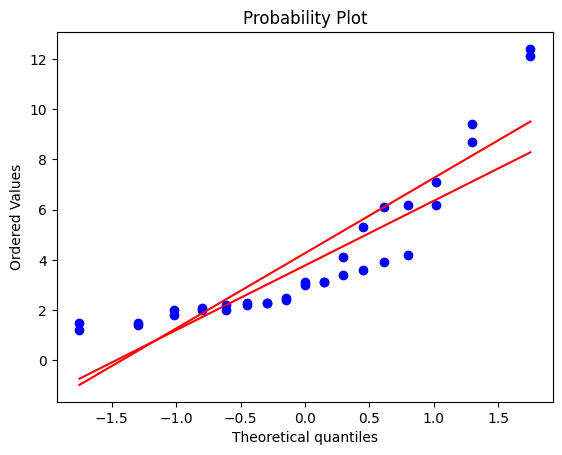

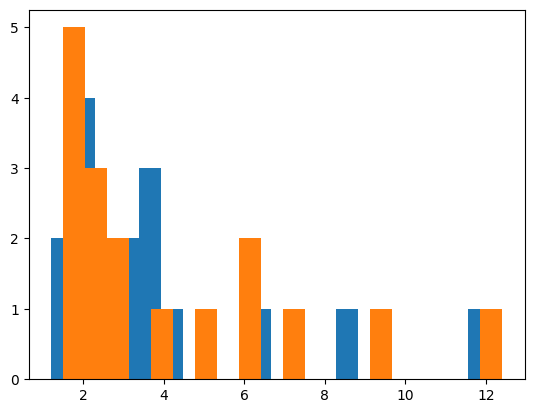

In [117]:
stat, pval = st.normaltest(developer_team)
print(pval)
stat, pval = st.normaltest(test_team)
print(pval)
st.probplot(developer_team, dist="norm", plot=pylab)  # красивое
st.probplot(test_team, dist="norm", plot=pylab)
pylab.show()
plt.hist(developer_team, bins=20)
plt.hist(test_team, bins=20)
plt.show()

Не похоже на нормально рапределение

In [126]:
stat, p = st.wilcoxon(developer_team, test_team)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
stat, p = st.mannwhitneyu(developer_team, test_team)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print("Выборки различаются незначительно, нет разницы")

Статистика = 63.00000, p = 0.79595
Статистика = 137.50000, p = 0.82265
Выборки различаются незначительно, нет разницы


<div class="alert alert-info">
<b>Задание № 4</b>

Психиатр хочет увидеть влияние заданий в нетологии на психическое состояние учеников. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.

</div>


In [127]:
only_breast = [
    794.1,
    716.9,
    993.0,
    724.7,
    760.9,
    908.2,
    659.3,
    690.8,
    768.7,
    717.3,
    630.7,
    729.5,
    714.1,
    810.3,
    583.5,
    679.9,
    865.1,
]

only_formula = [
    898.8,
    881.2,
    940.2,
    966.2,
    957.5,
    1061.7,
    1046.2,
    980.4,
    895.6,
    919.7,
    1074.1,
    952.5,
    796.3,
    859.6,
    871.1,
    1047.5,
    919.1,
    1160.5,
    996.9,
]

both = [
    976.4,
    656.4,
    861.2,
    706.8,
    718.5,
    717.1,
    759.8,
    894.6,
    867.6,
    805.6,
    765.4,
    800.3,
    789.9,
    875.3,
    740.0,
    799.4,
    790.3,
    795.2,
    823.6,
    818.7,
    926.8,
    791.7,
    948.3,
]

In [132]:
(len(both), len(only_breast), len(only_formula))

(23, 17, 19)

In [145]:
min_val = min((len(both), len(only_breast), len(only_formula)))
min_val

17

In [135]:
st.ttest_ind(only_breast, only_formula)

TtestResult(statistic=-6.5730537540281135, pvalue=1.5674024199277877e-07, df=34.0)

In [146]:
df = pd.DataFrame(
    {
        "only_breast": only_breast,
        "only_formula": only_formula[:min_val],
        "both": both[:min_val],
    }
)
df

,only_breast,only_formula,both
0,794.1,898.8,976.4
1,716.9,881.2,656.4
2,993.0,940.2,861.2
3,724.7,966.2,706.8
4,760.9,957.5,718.5
5,908.2,1061.7,717.1
6,659.3,1046.2,759.8
7,690.8,980.4,894.6
8,768.7,895.6,867.6
9,717.3,919.7,805.6


array([[<Axes: title={'center': 'only_breast'}>,
        <Axes: title={'center': 'only_formula'}>],
       [<Axes: title={'center': 'both'}>, <Axes: >]], dtype=object)

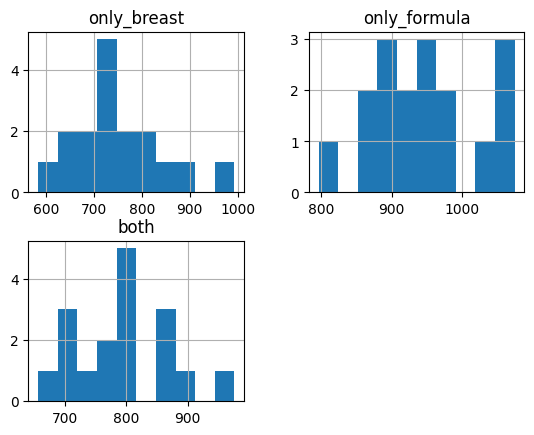

In [140]:
df.hist()

In [142]:
chi, pval, dof, exp = st.chi2_contingency(df.values)  # Критерий Пирсона (хи квадрат)
pval

1.3493809848800226e-44

In [147]:
stat, p = st.ttest_rel(a=only_breast[:min_val], b=only_formula[:min_val])
p

1.5540489986749038e-05

тут наверное я могу сказать, что я окончательно запутался ) нужны коментарии)<br>
могу предположить, что различия есть, потому что pval ~0, но я не понимаю как это интерпретировать<br>
и как найти причину разницы?

In [149]:
dif = np.array(both[:min_val]) - np.array(only_breast[:min_val])
stat, p = st.wilcoxon(dif)
print(p)
dif = np.array(both[:min_val]) - np.array(only_formula[:min_val])
stat, p = st.wilcoxon(dif)
print(p)

0.088653564453125
0.000213623046875


<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.

Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.

</div>


In [ ]:
contingency_table = pd.DataFrame(
    [[53, 23, 30, 36, 88], [71, 48, 51, 57, 203]],
    # columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index=["Ж", "М"],
)

print("Уровень риска")
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.

В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.

</div>


In [ ]:
youtube = [
    1913,
    1879,
    1939,
    2146,
    2040,
    2127,
    2122,
    2156,
    2036,
    1974,
    1956,
    2146,
    2151,
    1943,
    2125,
]

instagram = [
    2305.0,
    2355.0,
    2203.0,
    2231.0,
    2185.0,
    2420.0,
    2386.0,
    2410.0,
    2340.0,
    2349.0,
    2241.0,
    2396.0,
    2244.0,
    2267.0,
    2281.0,
]

facebook = [
    2133.0,
    2522.0,
    2124.0,
    2551.0,
    2293.0,
    2367.0,
    2460.0,
    2311.0,
    2178.0,
    2113.0,
    2048.0,
    2443.0,
    2265.0,
    2095.0,
    2528.0,
]

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

-   файлы;
-   архивы;
-   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.  Что я делаю?
2.  Какого результата я ожидаю?
3.  Как фактический результат отличается от ожидаемого?
4.  Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.
